# 泰坦尼克号数据分析

1.载入文档 - 成功

2.[分析仓位与存活率的相关性](#2.分析仓位与存活率的相关性) - 成功

3.[分析性别与存活率的相关性](#3.分析性别与存活率的相关性) - 成功

4.[分析年龄与存活率的相关性](#4.分析年龄与存活率的相关性) - 成功

5.[分析船上兄弟多寡与存活率的相关性](#5.分析船上兄弟多寡与存活率的相关性) - 成功

6.[分析船上直系亲属多寡与存活率的相关性](#6.分析船上直系亲属多寡与存活率的相关性) - 未有信服结论

7.分析船票号码与存活率的相关性- 未开始分析

8.[分析票价与存活率的相关性](#8.分析票价与存活率的相关性) - 成功

9.分析仓号码与存活率的相关性 - 未开始分析

10.[分析上船港口与存活率的相关性](#10.分析上船港口与存活率的相关性) - 成功

11.[总结](#总结)

## 1.载入文档

In [1]:
%matplotlib inline
# 如果不添加这句，是无法直接在jupyter里看到图的

# 导入所有需要的包盒函数
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns 
import statsmodels as sm

In [45]:
# 文档地址

#Series([1,3,5,np.nan,6,8])
#trip_data = pd.read_csv('https://github.com/ShiChJ/DAND-Basic-Materials/blob/master/P2/Project_Files/titanic-data.csv')
trip_data = pd.read_csv('titanic-data.csv')
trip_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [46]:
trip_data['Survived'].mean()

0.3838383838383838

## 2.分析仓位与存活率的相关性

In [5]:
pclass = trip_data.groupby('Pclass')['Survived'].mean()
pclass

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

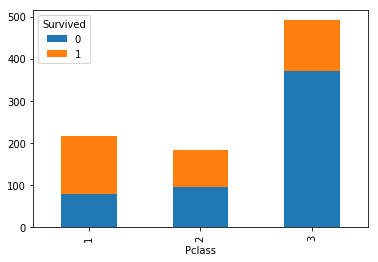

In [6]:
trip_data.groupby(['Pclass','Survived'])['Survived'].count().unstack().plot(kind = 'bar',stacked = 'True')

### 结论：
1.1等舱的船客能活下来，选它的存活率为63%，远高于其他两仓

2.3等舱死亡率为76%，基本就是个死了

## 3.分析性别与存活率的相关性

In [57]:
sex = pd.crosstab(trip_data['Sex'] , trip_data['Survived'])
sex

Survived,0,1
Sex,,
female,81,233
male,468,109


In [61]:
# 得到百分比
sex_pcts = sex.div(sex.sum(1), axis=0)
sex_pcts

Survived,0,1
Sex,,
female,0.257962,0.742038
male,0.811092,0.188908


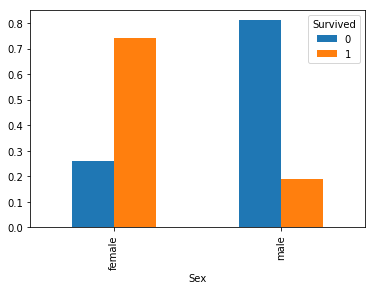

In [63]:
sex_pcts.plot.bar()

## 结论：
1.女性的存活率为74%，比一等舱的船客存活率还高

2.男性的死亡率为81%，比三等舱的船客存活率还高

3.从这个数据可以看到，“让女性先走”的确不是一句空话

## 4.分析年龄与存活率的相关性

In [24]:
#感觉10岁间隔还是不够清晰，所以以5岁为间隔
bins = np.arange(0, 90, 5)
trip_data['ageGroup'] = pd.cut(trip_data['Age'],bins)
trip_data.groupby(['ageGroup'])['PassengerId'].count()

ageGroup
(0, 5]       44
(5, 10]      20
(10, 15]     19
(15, 20]     96
(20, 25]    122
(25, 30]    108
(30, 35]     88
(35, 40]     67
(40, 45]     47
(45, 50]     39
(50, 55]     24
(55, 60]     18
(60, 65]     14
(65, 70]      3
(70, 75]      4
(75, 80]      1
(80, 85]      0
Name: PassengerId, dtype: int64

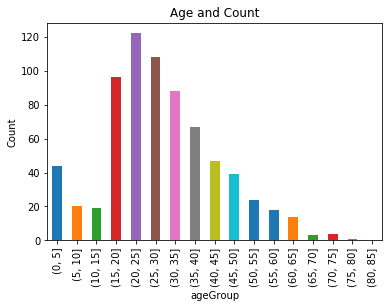

In [21]:
trip_data.groupby(['ageGroup'])['PassengerId'].count().plot(kind = 'bar')
plt.title("Age and Count")
plt.ylabel('Count')
plt.show()

In [23]:
trip_data.groupby(['ageGroup'])['Survived'].mean()

ageGroup
(0, 5]      0.704545
(5, 10]     0.350000
(10, 15]    0.578947
(15, 20]    0.343750
(20, 25]    0.344262
(25, 30]    0.388889
(30, 35]    0.465909
(35, 40]    0.417910
(40, 45]    0.361702
(45, 50]    0.410256
(50, 55]    0.416667
(55, 60]    0.388889
(60, 65]    0.285714
(65, 70]    0.000000
(70, 75]    0.000000
(75, 80]    1.000000
(80, 85]         NaN
Name: Survived, dtype: float64

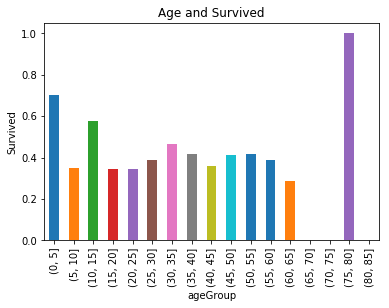

In [22]:
trip_data.groupby(['ageGroup'])['Survived'].mean().plot(kind = 'bar')
plt.title("Age and Survived")
plt.ylabel('Survived')
plt.show()

## 结论：
1.幼童&青少年存活率最高，大概在60%的水平

2.60岁以上人群存活率最低，有可能是因为身体不好；也可能因为人数太少，样本不足


## 5.分析船上兄弟多寡与存活率的相关性

In [27]:
sibsp = pd.crosstab(trip_data['SibSp'], trip_data['Survived'] )
sibsp.head()

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3


In [28]:
# 得到百分比
sibsp_pcts = sibsp.div(sibsp.sum(1), axis=0)
sibsp_pcts

Survived,0,1
SibSp,,
0,0.654605,0.345395
1,0.464115,0.535885
2,0.535714,0.464286
3,0.750000,0.250000
4,0.833333,0.166667
5,1.000000,0.000000
8,1.000000,0.000000


In [38]:
sibsp_pcts.iloc[:5]

Survived,0,1
SibSp,,
0,0.654605,0.345395
1,0.464115,0.535885
2,0.535714,0.464286
3,0.750000,0.250000
4,0.833333,0.166667


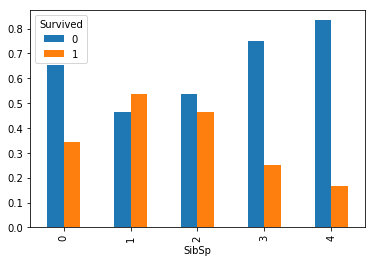

In [40]:
sibsp_pcts.iloc[:5].plot.bar()

## 结论：
1.有一个兄弟的乘客存活率最高，其次是有2个兄弟的

2.乘客最多有4个兄弟姐妹陪伴，但是死亡率同样最高

3.为什么会出现这个现象，推测是乘客兄弟越多，年纪就可能越大，死亡率也越高

## 6.分析船上直系亲属多寡与存活率的相关性

In [45]:
parch = pd.crosstab(trip_data['Parch'], trip_data['Survived'] )
parch

Survived,0,1
Parch,,
0,445,233
1,53,65
2,40,40
3,2,3
4,4,0
5,4,1
6,1,0


In [44]:
# 得到百分比
parch_pcts = parch.div(parch.sum(1), axis=0)
parch_pcts

Survived,0,1
Parch,,
0,0.656342,0.343658
1,0.449153,0.550847
2,0.500000,0.500000
3,0.400000,0.600000
4,1.000000,0.000000
5,0.800000,0.200000
6,1.000000,0.000000


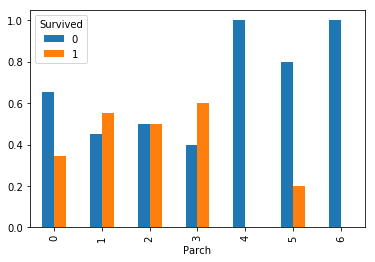

In [46]:
parch_pcts.plot.bar()

## 结论：
1.有1-3个家人陪伴的存活率稍高一些，但是由于样本不够，数据不是特别清晰

## 8.分析票价与存活率的相关性

In [34]:
#感觉10岁间隔还是不够清晰，所以以5岁为间隔
bins = np.arange(0, 170, 15)
trip_data['fareGroup'] = pd.cut(trip_data['Fare'],bins)
trip_data.groupby(['fareGroup'])['Fare'].count()

fareGroup
(0, 15]       443
(15, 30]      199
(30, 45]       63
(45, 60]       49
(60, 75]       25
(75, 90]       40
(90, 105]       4
(105, 120]     15
(120, 135]      4
(135, 150]      5
(150, 165]      9
Name: Fare, dtype: int64

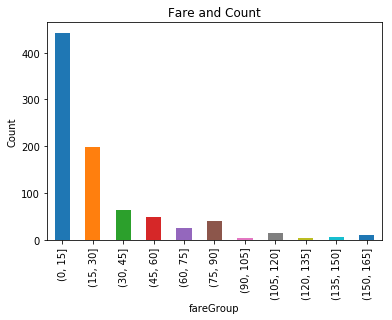

In [35]:
trip_data.groupby(['fareGroup'])['Fare'].count().plot(kind = 'bar')
plt.title("Fare and Count")
plt.ylabel('Count')
plt.show()

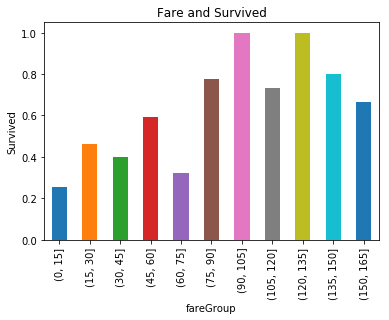

In [36]:
trip_data.groupby(['fareGroup'])['Survived'].mean().plot(kind = 'bar')
plt.title("Fare and Survived")
plt.ylabel('Survived')
plt.show()

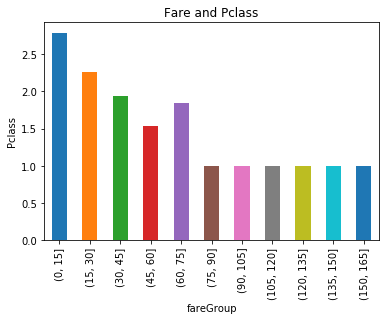

In [43]:
#观察票价与仓位的关系
trip_data.groupby(['fareGroup'])['Pclass'].mean().plot(kind = 'bar',)
plt.title("Fare and Pclass")
plt.ylabel('Pclass')
plt.show()

## 结论：
1.票价高于75的乘客存活率更高，这点跟仓位与存活率的关系相互印证，而且通过分析票价与仓位的关系也能得出这个结论

## 10.分析上船港口与存活率的相关性

In [65]:
Embarked = pd.crosstab(trip_data['Embarked'] , trip_data['Survived'])
Embarked 

Survived,0,1
Embarked,,
C,75,93
Q,47,30
S,427,217


In [66]:
# 得到百分比
Embarked_pcts = Embarked.div(Embarked.sum(1), axis=0)
Embarked_pcts

Survived,0,1
Embarked,,
C,0.446429,0.553571
Q,0.610390,0.389610
S,0.663043,0.336957


Text(0.5,1,'Embarked and Survived')

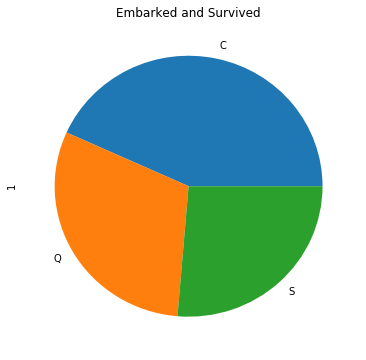

In [77]:
Embarked_pcts[1].plot.pie(subplots=True, figsize=(6, 6))
plt.title("Embarked and Survived")

## 结论：
1.C港口的存活率稍高于死亡率，成为3港口中存活率最高的港口，推测是因为这个港口的乘客多为1等舱

2.S和Q港口的死亡率都超过60%，比较危险

## 总结

从现有的数据可以得出，从C港口出发，与一位家人一起上船，并且买票的票价超过75的，住在一等舱的未成年女性存活概率最高。

这个数据一共有891行，总存活率38%左右。
实际 “泰坦尼克号”有1316名乘客，存活率在32%左右。
虽然有一点偏差，但这个样本还是比较大的。
